# Introduction

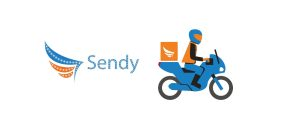

The costs of logistics in Sub-Saharan Africa increase the costs of manufactured goods up to 320% whereas in Europe it is only 90% of the manufacturing cost. Economies are better when logistics are efficient and affordable.

Sendy is a logistics company situated in Nairobi, Kenya, established in 2014 to enable businesses of all types and sizes to transport goods more efficiently across East Africa.

<br>

The purpose of the notebook aims to help Sendy predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination. This will enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience. 

In addition, the solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.

## Notebook Outline

### [1. Import Modules](#import)

### [2. Data](#data)
2.1. Riders DataFrame

2.2. Training Data

2.3. Test Data

2.4. Merged DataFrame

### [3. Exploratory Data Analysis](#eda)
3.1. Observations

3.2. Summary

### [4. Basic Model](#basic)
4.1. Basic Preprocessing

4.2. Splitting Data

4.3. Training Models

4.4. Base Results

### [5. Hyperparameter Tuning](#hyper)
5.1. XGBoost

5.2. Linear Regression

5.3. Lasso

5.4. Ridge

5.5. Elastic

5.6. Random Forest Regression

5.7. Decision Tree

5.8. Tuned Results

### [6. Zindi Submission](#zindi)

### [7. Conclusion](#conclusion)
7.1. References

### 1. Import Modules

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.style as style
import numpy as np
from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.neighbors import *
from sklearn.isotonic import *
from sklearn.gaussian_process import *
from sklearn import *
from sklearn.svm.classes import *
from sklearn.ensemble import*
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.api import add_constant
from sklearn.linear_model import *
import xgboost as xgb
from xgboost import plot_importance

import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from plotnine import *
import cufflinks as cf

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
%matplotlib inline

C:\Users\kmoep\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
  warnings.warn(message, FutureWarning)


### 2. Data


The Variable definitions dataframe lists the column names found in the:

    1)Rider;
    2)Train;
    3)Test;
    4)Sample Submissions dataframes.


In [2]:
path = r'C:\Users\kmoep\Desktop\Zindi Data\\'
#path = r'C:\Users\ADMIN\Desktop\KgomotsoZ\\'
train = pd.read_csv(path + r'Train.csv')
test = pd.read_csv(path + r'Test.csv')
riders = pd.read_csv(path + r'Riders.csv')
variables = pd.read_csv(path + r'VariableDefinitions.csv')

#### 2.1. Rider DataFrame
<br>
The Rider Dataframe lists all the riders that have delivered orders and any information pertaining to that particular rider for example:

    1)Rider Id - The unique identity given to each rider;
    2)No_Of_Orders - The number of orders done by the particular rider;
    3)Age - The number of days the rider has been active on the platform;
    4)Average_Rating - the average ratng out of 15;
    5)No_of_Ratings - the number of times the rider has been rated over the course of his/her/their career.

In [3]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


To understand our data we use a Pandas method that prints the information about the given DataFrame. 

    The information printed: the index dtype,column dtypes, non-null values and memory usage
    
Once we have a brief understanding of our data we return the shape of the DataFrame as a tuple representing the dimensionality of the DataFrame.

In [4]:
riders.info()
riders.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


(960, 5)

#### 2.2.Training Data
<br>
The Train Dataframe lists all the orders that have been placed and any information pertaining to that particular order for example:

    1) Order No - The unique tracking number assigned to a specific order;
    2) User Id - The identity of the individual/(s) who have placed the order;
    3) Vehicle Type - Deliveries are done but multiple modes of transport but due to the sake of uniformity we have used only one vehicle type being the 'Bike';
    4) Platform Type - Platform used to place the order, there are 4 types;
    5) Personal or Business - Customer type;
    6) Placement(- Day of the Month) - Day of the month between the 1st and the 31st when the order is placed;
    7) Placement(- weekday (Mo=1)) - Placement weekday where numbers 1 to 7 are assigned where 1 is a Monday;
    8) Placement(- Time) - Time of day the order was placed;
    9) Confirmation(- Day of Month i.e 1-31) - Day of the month between the 1st and the 31st when the order is confirmed;
    10) Confirmation( - Weekday (Monday = 1)) - Confirmation weekday where numbers 1 to 7 are assigned where 1 is a Monday;
    11) Confirmation(- Time) - Time of day the order was confirmed by a rider;
    12 Arrival at Pickup(- Day of Month i.e 1-31) - Day of the month between the 1st and the 31st when the order arrives;
    13) Arrival at Pickup(- Weekday (Monday = 1)) -Arrival weekday where numbers 1 to 7 are assigned where 1 is a Monday;
    14) Arrival at Pickup(- Time) - Time of day the rider arrived at the location to pick up the order - as marked by the rider through the Sendy application
<br>
and various other columns to aid us in solving the problem statement

In [5]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [6]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

(21201, 29)

#### 2.3. Test Data
<br>
The Test Dataframe lists all the orders that have been placed and any information pertaining to that particular order for example:

    1) Order No - The unique tracking number assigned to a specific order;
    2) User Id - The identity of the individual/(s) who have placed the order;
    3) Vehicle Type - Deliveries are done but multiple modes of transport but due to the sake of uniformity we have used only one vehicle type being the 'Bike';
    4) Platform Type - Platform used to place the order, there are 4 types;
    5) Personal or Business - Customer type;
    6) Placement(- Day of the Month) - Day of the month between the 1st and the 31st when the order is placed;
    7) Placement(- weekday (Mo=1)) - Placement weekday where numbers 1 to 7 are assigned where 1 is a Monday;
    8) Placement(- Time) - Time of day the order was placed;
    9) Confirmation(- Day of Month i.e 1-31) - Day of the month between the 1st and the 31st when the order is confirmed;
    10) Confirmation( - Weekday (Monday = 1)) - Confirmation weekday where numbers 1 to 7 are assigned where 1 is a Monday;
    11) Confirmation(- Time) - Time of day the order was confirmed by a rider;
    12 Arrival at Pickup(- Day of Month i.e 1-31) - Day of the month between the 1st and the 31st when the order arrives;
    13) Arrival at Pickup(- Weekday (Monday = 1)) -Arrival weekday where numbers 1 to 7 are assigned where 1 is a Monday;
    14) Arrival at Pickup(- Time) - Time of day the rider arrived at the location to pick up the order - as marked by the rider through the Sendy application
<br>
and various other columns to aid us in solving the problem statement

In [7]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [8]:
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

(7068, 25)

#### 2.4. Merged DataFrame

<br>

Instead of having seperate data frames, we decided to merge the Training/Test DataFrame with the Rider DataFrame. This DataFrame will be used for the data transformation and modelling in the longrun and is very vital in increasing the amount of information used to train the model.

In [9]:
# Merging the train data frame with the riders data frame on Rider ID
train_rd = train.merge(riders, how='left', on='Rider Id')
# Merging the test data frame with the riders data frame on Rider ID
test_rd = test.merge(riders, how='left', on='Rider Id')

In [10]:
train_rd.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


### 3. Exploratory Data Analysis
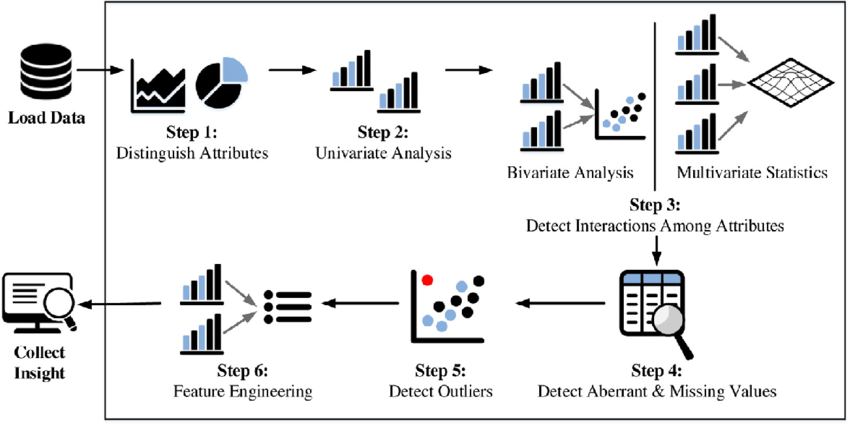
<br>
In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.This approach for data analysis uses many tools(mainly graphical to maximize insight into a data set, extract important variables, detect outliers and anomalies, amongst other details that is missed when looking at DataFrame.


This step is very important especially when we model the data in order to apply Machine Learning techniques.

In [11]:
# A function that performs summary statistics over a DataFrame using Pandas methods.

def categorical_eda(df):
    """
   
   A quick analysis of the train_df DataFrame to get a brief overview of the non-numerical data.
          
    Parameters: 
    df (pd): a Pandas DataFrame representing train data frame. It contains all the data in which the summary 
        statistics would be performed.
    
    Returns: 
    df: A DataFrame of the summary statistics on each of the columns within the respective data frame. 
            - if the summary statistics don't respond to any column, it will return a NaN value.
    """
    column_list = list(df)
    col_list = []
    for col in column_list:
        # selects columns of object data types
        if df[col].dtypes == 'O':
            # adds the column name to the list col_list
            col_list.append(col)  
    
    df_cat = df[col_list]
    
    summary_df = {}
     # creates a column called null_sum that shows the total number of null values
    summary_df['null_sum'] = df_cat.isnull().sum()
    summary_df['dtypes'] = df_cat.dtypes
    summary_df['count'] = df_cat.count()
    return pd.DataFrame(summary_df)

In [12]:
categorical_eda(train_rd)

,null_sum,dtypes,count
Order No,0,object,21201
User Id,0,object,21201
Vehicle Type,0,object,21201
Personal or Business,0,object,21201
Placement - Time,0,object,21201
Confirmation - Time,0,object,21201
Arrival at Pickup - Time,0,object,21201
Pickup - Time,0,object,21201
Arrival at Destination - Time,0,object,21201
Rider Id,0,object,21201


In [13]:
def numerical_eda(df):
    """
   A quick analysis of the train_df DataFrame to get a brief overview of the numerical data.
          
    Parameters: 
    df (pd): a Pandas DataFrame representing train data frame. It contains all the data in which the summary 
        statistics would be performed.
    
    Returns: 
    df: A DataFrame of the summary statistics on each of the columns within the respective data frame. 
            - if the summary statistics don't respond to any column, it will return a NaN value.
    """
    numerical_list = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical_df = {}
    #calculates the five number summary of all numerical columns
    numerical_df['mean'] = df.select_dtypes(include=numerical_list).mean()
    numerical_df['std'] = df.select_dtypes(include=numerical_list).std()
    numerical_df['25%'] = df.select_dtypes(include=numerical_list).quantile(q=0.25)
    numerical_df['median'] = df.select_dtypes(include=numerical_list).median()
    numerical_df['75%'] = df.select_dtypes(include=numerical_list).quantile(q=0.75)
    numerical_df['min'] = df.select_dtypes(include=numerical_list).min()
    numerical_df['max'] = df.select_dtypes(include=numerical_list).max()

    return pd.DataFrame(numerical_df)

In [14]:
numerical_eda(train_rd)

,mean,std,25%,median,75%,min,max
Platform Type,2.752182,0.625178,3.000000,3.000000,3.000000,1.000000,4.000000
Placement - Day of Month,15.653696,8.798916,8.000000,15.000000,23.000000,1.000000,31.000000
Placement - Weekday (Mo = 1),3.240083,1.567295,2.000000,3.000000,5.000000,1.000000,7.000000
Confirmation - Day of Month,15.653837,8.798886,8.000000,15.000000,23.000000,1.000000,31.000000
Confirmation - Weekday (Mo = 1),3.240225,1.567228,2.000000,3.000000,5.000000,1.000000,7.000000
Arrival at Pickup - Day of Month,15.653837,8.798886,8.000000,15.000000,23.000000,1.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),3.240225,1.567228,2.000000,3.000000,5.000000,1.000000,7.000000
Pickup - Day of Month,15.653837,8.798886,8.000000,15.000000,23.000000,1.000000,31.000000
Pickup - Weekday (Mo = 1),3.240225,1.567228,2.000000,3.000000,5.000000,1.000000,7.000000
Arrival at Destination - Day of Month,15.653837,8.798886,8.000000,15.000000,23.000000,1.000000,31.000000


#### **3.1. Observations**

There are 21 201 rows of data and 33 columns.
The precipitation_in_millimeters and temperature column contain a large amount of Null values

    1) Precipitation_in_millimeters: 97.4% missing values;
    2) Temperature: 20.6% missing values
        
We have decided to split the data into two types, being:

    1) Categorical Data;
    2) Numerical Data.
    
The data types within the train_rd data frame are:

    1) int64 - 16
    2) float64 - 7
    3) object - 10
    
There are a few columns that consist of string or text values that need cleaned before modelling.

**Conclusions**
After anlysing the data further we noticed the following:


    1) Not all numeric data is important for modelling;
    2) Many columns contain categorical or ordinal features that can be converted to numeric values through data cleaning and that they relate to the time_from pick up to arrival that we are trying to predict.
        
For the object data types, returns the summary statistics as a NaN value as it cannot compute any values for the columns as it is a string. It will only return the minimum and maximum values in that column. The mean is observed to be higher than the median and there is a big difference between the 75th percentile and the maximum value which could indicate there maybe be outliers within the dataset.


In [15]:
train_rd['Order No'].value_counts()

Order_No_12803    1
Order_No_2716     1
Order_No_15808    1
Order_No_6353     1
Order_No_9484     1
                 ..
Order_No_18555    1
Order_No_20538    1
Order_No_3347     1
Order_No_8843     1
Order_No_23434    1
Name: Order No, Length: 21201, dtype: int64

In [16]:
train_rd['Vehicle Type'].value_counts()

Bike    21201
Name: Vehicle Type, dtype: int64

In [17]:
train_rd['Platform Type'].value_counts()

3    18054
1     2147
2      980
4       20
Name: Platform Type, dtype: int64

In [18]:
train_rd['Personal or Business'].value_counts()

Business    17384
Personal     3817
Name: Personal or Business, dtype: int64

In [19]:
def unique_values(df):
    """
    Determines the number of unique values in a dataframe that has the following column names
    'vehicle_type', 'platform_type','personal_or_business', 'distance_(km)','temperature', 
    'precipitation_in_millimeters', and 'average_rating'
    
    Parameters:
    df (pd): A dataframe that has the following column  names 'vehicle_type', 'platform_type','personal_or_business',
    'distance_(km)','temperature', 'precipitation_in_millimeters', and 'average_rating'.
    
    returns:
    df (pd): A dataframe of column names and the number of unique values in each column
    """
    my_df = {}
    # Replaces white spaces with an underscore and change every upper case letter to lower case
    train_rd.columns = [col.replace(' ', '_').lower() 
                   for col in train_rd.columns]
    # Calculates the number of unique values in each column
    my_df['no_of_unique_values'] = train_rd[['vehicle_type', 'platform_type',
                                            'personal_or_business', 'distance_(km)',
                                            'temperature', 'precipitation_in_millimeters', 'average_rating']
                                            ].nunique()

    my_df = pd.DataFrame(my_df).rename_axis('column_name').reset_index()
    return my_df

In [20]:
def second_unique(df):
    """
    Determines the number of unique values in a dataframe that has the following column names
    'no_of_ratings','age','no_of_orders','rider_id', and 'order_no'
    
    Parameters:
    df (pd): A dataframe that has the following column  names  'no_of_ratings','age',
    'no_of_orders','rider_id', and 'order_no'.
    
    returns:
    df (pd): A dataframe of column names and the number of unique values in each column
    """
    my_df1 = {}
    #Replaces white spaces with an underscore and change every upper case letter to lower case
    train_rd.columns = [col.replace(' ', '_').lower()
                   for col in train_rd.columns]
    #calculates the number of unique values in each column
    my_df1['no_of_unique_values'] = train_rd[['no_of_ratings', 'age',
                                              'no_of_orders', 'rider_id',
                                              'user_id', 'order_no']
                                                 ].nunique()

    my_df1 = pd.DataFrame(my_df1).rename_axis('column_name').reset_index()

    return my_df1

In [21]:
data = px.data.gapminder()
data1 = unique_values(train_rd)
fig = px.bar(data1, x='no_of_unique_values',
             y = 'column_name', color='no_of_unique_values',
             labels = {'no_of_unique_values': 'Unique values',
                     'column_name': 'Column Name'},
             height = 400)
fig.show()

data2 = px.data.gapminder()
data3 = second_unique(train_rd)
fig = px.bar(data3, x = 'no_of_unique_values',
             y = 'column_name', color='no_of_unique_values',
             labels = {'no_of_unique_values': 'Unique values',
                     'column_name': 'Column Name'},
             height = 400)
fig.show()

1) There is only one vehicle type used to in the dataset being the 'Bike';

2) Ther are 21 201 order numbers which means there are no repeated values;

3) There are currently 3 186 customers that use Sendy's services which could mean that customers have repeatly used Sendy's services or find the platform user friendly;

4) Based on the information provided, 924 riders are currently making deliveries for Sendy, which could indicates that Sendy provided longterm employment for their drivers and this could also link to the working environment being welcoming.

In [22]:
train_rd['distance_(km)'].value_counts().iplot(kind = 'bar', 
                                              bins = 30, 
                                              theme = 'white', 
                                              color = 'purple',
                                              title = 'Total distance travelled per order', 
                                              xTitle = 'Distance(km)', 
                                              yTitle = 'Count')


train_rd[['distance_(km)']].iplot(kind = 'box', color = 'blue')

##### **3.2. Summary**

1) The minimum distance travelled is 1km and the maximum distance travelled is 49km;

2) From the above graphs, we can see that there are a lot of outliers in the database and this may effect on the model since distance has shown to have the highest correlation with the dependent variable;

3) 75% of the orders in our dataset are delivered within a distance of 13km which means that our data is heavily skewed to the right. 

In [23]:
train_rd.columns

Index(['order_no', 'user_id', 'vehicle_type', 'platform_type',
       'personal_or_business', 'placement_-_day_of_month',
       'placement_-_weekday_(mo_=_1)', 'placement_-_time',
       'confirmation_-_day_of_month', 'confirmation_-_weekday_(mo_=_1)',
       'confirmation_-_time', 'arrival_at_pickup_-_day_of_month',
       'arrival_at_pickup_-_weekday_(mo_=_1)', 'arrival_at_pickup_-_time',
       'pickup_-_day_of_month', 'pickup_-_weekday_(mo_=_1)', 'pickup_-_time',
       'arrival_at_destination_-_day_of_month',
       'arrival_at_destination_-_weekday_(mo_=_1)',
       'arrival_at_destination_-_time', 'distance_(km)', 'temperature',
       'precipitation_in_millimeters', 'pickup_lat', 'pickup_long',
       'destination_lat', 'destination_long', 'rider_id',
       'time_from_pickup_to_arrival', 'no_of_orders', 'age', 'average_rating',
       'no_of_ratings'],
      dtype='object')

In [24]:
"""
     A quick analysis of the train_df DataFrame to get a breakdown of the busiest times for Sendys.
"""

new_df = {}
new_df['placement'] = train_rd['placement_-_day_of_month'].value_counts()
new_df['confirmation'] = train_rd['confirmation_-_day_of_month'].value_counts()
new_df['arrival_at_pickup'] = train_rd['arrival_at_pickup_-_day_of_month'].value_counts()
new_df['pickup'] = train_rd['pickup_-_day_of_month'].value_counts()
new_df['arrival_at_destination'] = train_rd['arrival_at_destination_-_day_of_month'].value_counts()

new_df = pd.DataFrame(new_df).rename_axis('Day')

In [25]:
new_df

,placement,confirmation,arrival_at_pickup,pickup,arrival_at_destination
Day,,,,,
1,482,482,482,482,482
2,602,602,602,602,602
3,718,718,718,718,718
4,769,769,769,769,769
5,747,747,747,747,747
6,794,794,794,794,794
7,822,822,822,822,822
8,848,848,848,848,848
9,667,667,667,667,667


From this information we can see that orders and deliveris occur everyday and that there is no break from when the company is operational

#### 3.3. Arrival at Pickup

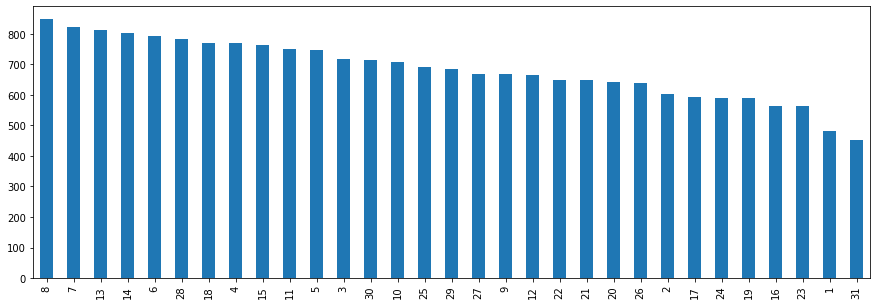

In [40]:
train['Arrival at Pickup - Day of Month'].value_counts().plot(kind='bar',figsize=[15,5])

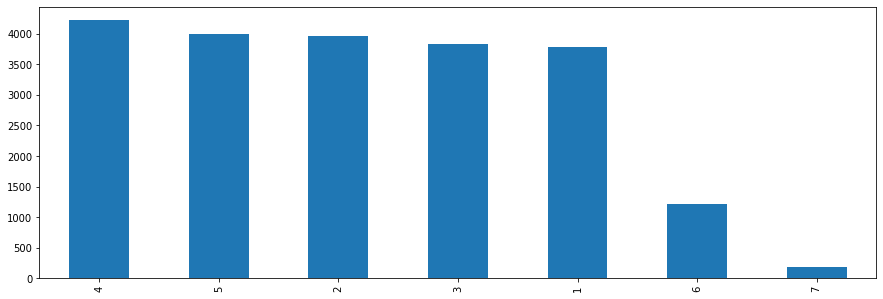

In [41]:
train['Arrival at Pickup - Weekday (Mo = 1)'].value_counts().plot(kind='bar',figsize=[15,5])

So according to the graph the weekend is less busy compared to the other days. Thursday has more orders and deliveries.

Something to keep in mind

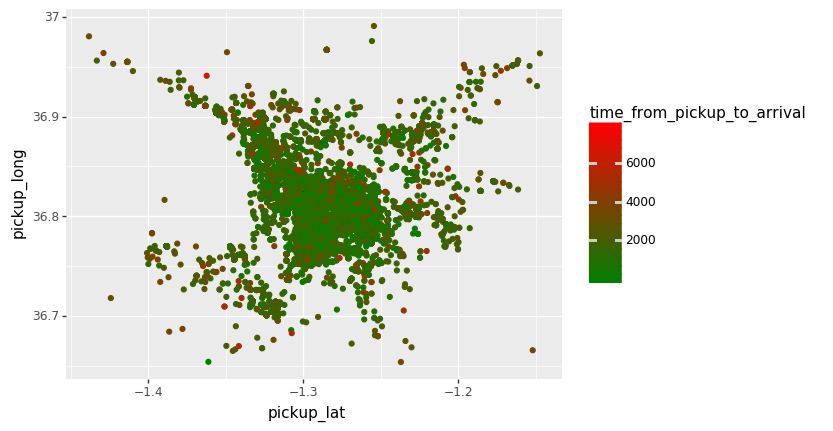

<ggplot: (-9223371874370111592)>

In [42]:
ggplot(aes(x = 'pickup_lat', 
           y ='pickup_long', 
           color = 'time_from_pickup_to_arrival'), 
           data = train_rd) + \
           geom_point() + \
           scale_color_gradient(low = 'green', high ='red')

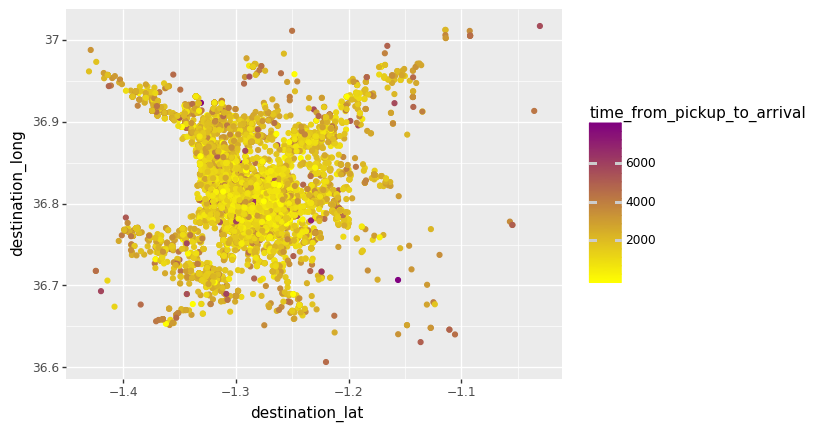

<ggplot: (-9223371874369700348)>

In [29]:
ggplot(aes(x = 'destination_lat', 
           y = 'destination_long', 
           color = 'time_from_pickup_to_arrival'), 
           data = train_rd) + \
           geom_point() + \
           scale_color_gradient(low = 'yellow', high = 'purple')

1) The distance of drop-offs are wider spread than pick up points and many destination arrival time will be influenced by wider distances;

2) We also notice that lengthy times for deliveries occur in both the central and outlier destinations this could be as a result of traffic congestion and distance which are all influential in the pick to arrival time duration;

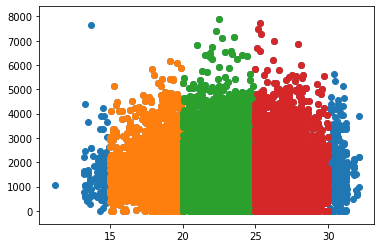

In [44]:
plt.scatter(train_rd['temperature'],train_rd['time_from_pickup_to_arrival'])
plot1 = train_rd[(train_rd['temperature']>=15)&(train_rd['temperature']<=20)]
plt.scatter(plot1.temperature,plot1['time_from_pickup_to_arrival'])
plot2 = train_rd[(train_rd['temperature']>=20)&(train_rd['temperature']<=25)]
plt.scatter(plot2.temperature,plot2['time_from_pickup_to_arrival'])
plot3 = train_rd[(train_rd['temperature']>=25)&(train_rd['temperature']<=30)]
plt.scatter(plot3.temperature,plot3['time_from_pickup_to_arrival'])

we have more deliveries when the temperature is over 20°c and below 30°c.
when the temperature is below 15°c we have less deliveries, meaning we have more orders and Deliveries when the Temperature is at 25°c.

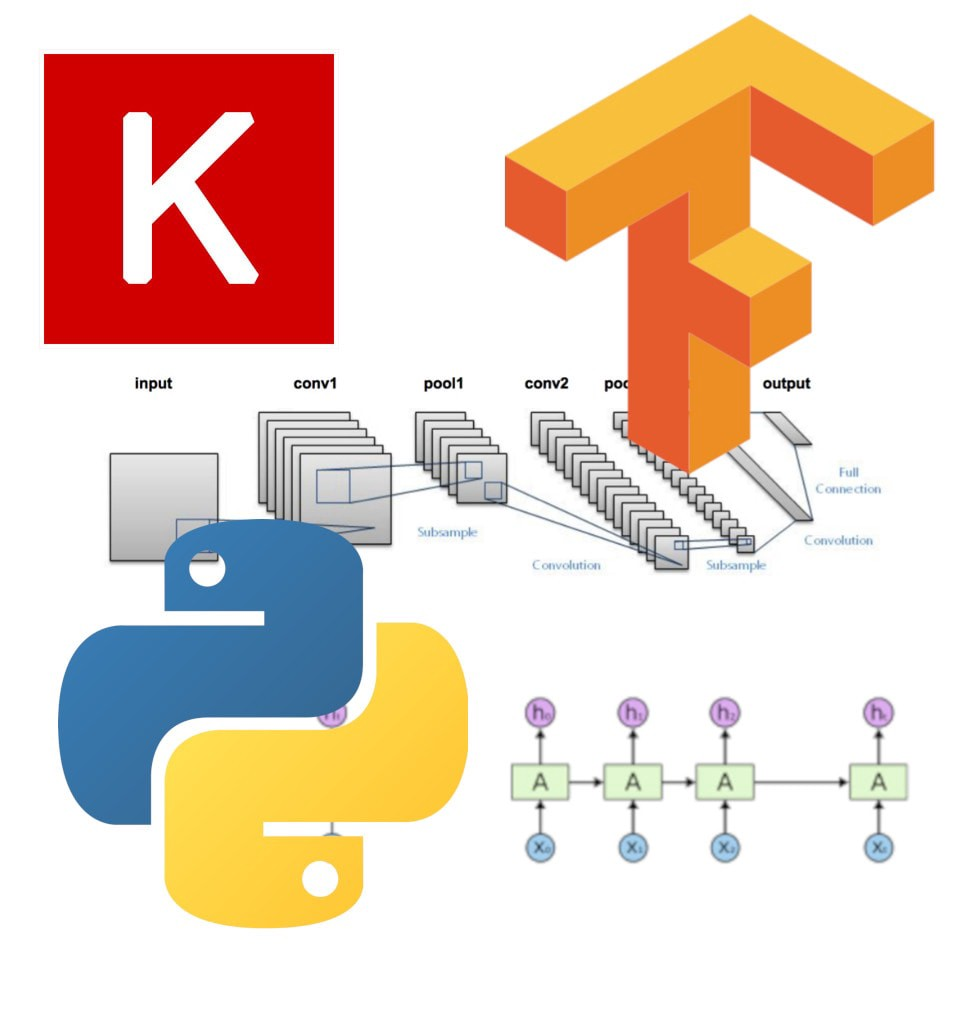
### 4. Basic Model

#### 4.1. Basic Preprocessing

In [30]:
# Select all categorical variables from the train data set
Categorical_Train = train_rd.select_dtypes(include = ['object'])
# Select all categorical variables from the test data set
Categorical_Test = test_rd.select_dtypes(include = ['object'])

In [31]:
Categorical_Train.head()

,order_no,user_id,vehicle_type,personal_or_business,placement_-_time,confirmation_-_time,arrival_at_pickup_-_time,pickup_-_time,arrival_at_destination_-_time,rider_id
0,Order_No_4211,User_Id_633,Bike,Business,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:27:30 AM,10:39:55 AM,Rider_Id_432
1,Order_No_25375,User_Id_2285,Bike,Personal,11:16:16 AM,11:23:21 AM,11:40:22 AM,11:44:09 AM,12:17:22 PM,Rider_Id_856
2,Order_No_1899,User_Id_265,Bike,Business,12:39:25 PM,12:42:44 PM,12:49:34 PM,12:53:03 PM,1:00:38 PM,Rider_Id_155
3,Order_No_9336,User_Id_1402,Bike,Business,9:25:34 AM,9:26:05 AM,9:37:56 AM,9:43:06 AM,10:05:27 AM,Rider_Id_855
4,Order_No_27883,User_Id_1737,Bike,Personal,9:55:18 AM,9:56:18 AM,10:03:53 AM,10:05:23 AM,10:25:37 AM,Rider_Id_770


In [32]:
Categorical_Test.head()

,Order No,User Id,Vehicle Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Rider Id
0,Order_No_19248,User_Id_3355,Bike,Business,4:44:10 PM,4:44:29 PM,4:53:04 PM,5:06:47 PM,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,Business,12:57:35 PM,12:59:17 PM,1:20:27 PM,1:25:37 PM,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,Business,11:08:14 AM,11:25:05 AM,11:33:20 AM,11:57:54 AM,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,Business,1:51:35 PM,1:53:27 PM,2:02:41 PM,2:16:52 PM,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,Business,11:30:28 AM,11:34:45 AM,11:47:19 AM,11:56:04 AM,Rider_Id_858


We are goint to encode the categorical variables in the Categorical_Train and Categorical_Test data frames so that these columns can be included when we train and test our model.

In [33]:
le = LabelEncoder()
encoded_categorical_Train = Categorical_Train.apply(lambda x: le.fit_transform(x))
encoded_categorical_Test = Categorical_Test.apply(lambda x: le.fit_transform(x))

encoded_categorical_Train.head()

,order_no,user_id,vehicle_type,personal_or_business,placement_-_time,confirmation_-_time,arrival_at_pickup_-_time,pickup_-_time,arrival_at_destination_-_time,rider_id
0,16358,2839,0,0,14964,15164,130,808,1048,362
1,12783,1212,0,1,2379,2590,3096,3182,3992,812
2,7485,1560,0,0,4992,5105,5260,5342,5355,61
3,20667,381,0,0,14679,14793,15138,15247,120,811
4,14863,690,0,1,15544,15639,100,151,626,720


Extracting all the numerical data from the train_rd and test_rd data frames

In [34]:
# Select all numerical columns from the train_rd data frame
Numeric_Train = train_rd._get_numeric_data()
Numeric_Test = test_rd._get_numeric_data()
Numeric_Train.head(2)

,platform_type,placement_-_day_of_month,placement_-_weekday_(mo_=_1),confirmation_-_day_of_month,confirmation_-_weekday_(mo_=_1),arrival_at_pickup_-_day_of_month,arrival_at_pickup_-_weekday_(mo_=_1),pickup_-_day_of_month,pickup_-_weekday_(mo_=_1),arrival_at_destination_-_day_of_month,...,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings
0,3,9,5,9,5,9,5,9,5,9,...,NaN,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,12,5,12,5,12,5,12,5,12,...,NaN,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69


In [35]:
# Combine the numerical data with the encoded train categorical data
train_encoded = pd.concat([encoded_categorical_Train, Numeric_Train], axis = 1)
# Combine the numerical data with the encoded test categorical data
test_encoded = pd.concat([encoded_categorical_Test, Numeric_Test], axis = 1)

In [36]:
train_encoded.head()

,order_no,user_id,vehicle_type,personal_or_business,placement_-_time,confirmation_-_time,arrival_at_pickup_-_time,pickup_-_time,arrival_at_destination_-_time,rider_id,...,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings
0,16358,2839,0,0,14964,15164,130,808,1048,362,...,NaN,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,12783,1212,0,1,2379,2590,3096,3182,3992,812,...,NaN,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69
2,7485,1560,0,0,4992,5105,5260,5342,5355,61,...,NaN,-1.308284,36.843419,-1.300921,36.828195,455,1023,242,12.5,114
3,20667,381,0,0,14679,14793,15138,15247,120,811,...,NaN,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113
4,14863,690,0,1,15544,15639,100,151,626,720,...,NaN,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872,14.1,533


We have observed that there is a significant ammount of missing values in 2 of our columns. There is 20.6% and 97.8% of missing values in the temperature and precipitation_in_millimeters columns respectively so we decided to drop the these columns.

In [37]:
y = train_encoded[:len(train_rd)][['time_from_pickup_to_arrival']]
X = train_encoded[:len(train_rd)].drop(['time_from_pickup_to_arrival','order_no',
                                  'user_id','precipitation_in_millimeters',
                                       'temperature'], axis=1)

In [38]:
X.head()

,vehicle_type,personal_or_business,placement_-_time,confirmation_-_time,arrival_at_pickup_-_time,pickup_-_time,arrival_at_destination_-_time,rider_id,platform_type,placement_-_day_of_month,...,arrival_at_destination_-_weekday_(mo_=_1),distance_(km),pickup_lat,pickup_long,destination_lat,destination_long,no_of_orders,age,average_rating,no_of_ratings
0,0,0,14964,15164,130,808,1048,362,3,9,...,5,4,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549
1,0,1,2379,2590,3096,3182,3992,812,3,12,...,5,16,-1.351453,36.899315,-1.295004,36.814358,396,339,13.6,69
2,0,0,4992,5105,5260,5342,5355,61,3,30,...,2,3,-1.308284,36.843419,-1.300921,36.828195,1023,242,12.5,114
3,0,0,14679,14793,15138,15247,120,811,3,15,...,5,9,-1.281301,36.832396,-1.257147,36.795063,886,283,14.5,113
4,0,1,15544,15639,100,151,626,720,1,13,...,1,9,-1.266597,36.792118,-1.295041,36.809817,2311,872,14.1,533


#### 4.2. Splitting Data

Splitting the dataset into the training set and test set

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 4.3. Training Models

Training the models and calclating the RMSE, MSE, RSS, R-squared, and train time

In [34]:
# Create a list of all the regression models we will use
regression = [
                LinearRegression(), Ridge(alpha = 0.01), Lasso(alpha = 0.01),
                ElasticNet(), RandomForestRegressor(), xgb.XGBRegressor(),
                DecisionTreeRegressor()
            ]
# Create a list of the various names of the regression models
name = [
        'Linear', 'Lasso', 'Ridge', 'Elastic Net', 
        'Random Forest Regressor', 'XGboost',
        'DecisonTree'
        ]

base_result = []
models = {}

for name, reg in zip(name, regression):
    print ('Team 2 at work {:s} model'.format(name))
    run_time = %timeit -q -o reg.fit(X_train, y_train)
    print('...predicting')
    y_pred = reg.predict(X_test)
    print('...evaluating')
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    rss = mean_squared_error(y_test, y_pred)*len(train)
    r2 = r2_score(y_test, y_pred)
    models[name] = reg
    base_result.append([name, rmse,
                        mse, rss, r2,
                        run_time.best])
    
base_result = pd.DataFrame(base_result, columns = [
                                                'Regressor', 'RMSE',
                                                'MSE', 'RSS', 'R2',
                                                'Train Time'
                                                ])
base_result.set_index('Regressor', inplace = True)

Team 2 at work Linear model
...predicting
...evaluating
Team 2 at work Lasso model
...predicting
...evaluating
Team 2 at work Ridge model


C:\Users\mojel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3602913103.9633436, tolerance: 1654412.127172353

C:\Users\mojel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3602913103.9633436, tolerance: 1654412.127172353

C:\Users\mojel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3602913103.9633436, tolerance: 1654412.127172353

C:\Users\mojel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3602913103.9633436, to

...predicting
...evaluating
Team 2 at work Elastic Net model
...predicting
...evaluating
Team 2 at work Random Forest Regressor model


C:\Users\mojel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\mojel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\mojel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\mojel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\mojel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column

...predicting
...evaluating
Team 2 at work XGboost model
...predicting
...evaluating
Team 2 at work DecisonTree model
...predicting
...evaluating


#### 4.4. Base Results

In [35]:
base_result

,RMSE,MSE,RSS,R2,Train Time
Regressor,,,,,
Linear,796.221499,6.339687e+05,1.344077e+10,0.347305,0.016589
Lasso,796.221802,6.339692e+05,1.344078e+10,0.347305,0.013157
Ridge,796.304270,6.341005e+05,1.344356e+10,0.347170,0.505279
Elastic Net,798.491512,6.375887e+05,1.351752e+10,0.343579,0.049012
Random Forest Regressor,688.929329,4.746236e+05,1.006250e+10,0.511357,38.076343
XGboost,274.365348,7.527634e+04,1.595934e+09,0.922500,2.382899
DecisonTree,1034.870164,1.070956e+06,2.270534e+10,-0.102590,0.609995


1. There is not much difference in terms of RMSE, RSS, and R2 for the Linear, Lasso, and Ridge regression models. The only concern regarging the Linear, Lasso, and Ridge is that they have a low multiple coefficient of determination. All 3 models have a multiple coefficient of determinstion of 0.347. This tells us that the features we've selected can only explain 34.7% of the variation in the dependent variable, time_from_piclup_to_arrival.


2. Out of all the models selected, the DecisionTree model is the worst perfming model with the highest RMSE score.


3. The best performing model is the XGboost with the lowest RMSE score of 274.36 and the highest multiple coefficient of determination of 0.923. 92.3% of the variation in the dependent variable can be explained by the selected features.

### 5. Hyperparameter Tuning

#### 5.1. XGBoost

In [50]:
def hyperParameterTuning(X_train, y_train):
    """
    chooses a set of optimal parameters for a learning algorithm, parameters whose
    value is used to control the learning porcess.
    
    Parameters:
    df1: Dataframe of feartures
    df2: Series of the independent variable.
    
    returns:
    a dictionary.
    
    """
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = xgb.XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

hyperParameterTuning(X_Final_Train, Y_Final_Train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.6min

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 34.0min

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 63.3min

[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 106.8min

[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 133.9min finished

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

### 6. Zindi Submission

In [37]:
df_train = train_encoded.copy()
df_test = test_encoded.copy()
df_test = df_test.drop(['Precipitation in millimeters',
                       'Temperature'], axis = 1)
X = train_encoded[:len(train_rd)].drop(['time_from_pickup_to_arrival',
                                  'arrival_at_destination_-_day_of_month','precipitation_in_millimeters',
                                       'temperature','arrival_at_destination_-_weekday_(mo_=_1)',
                                       'arrival_at_destination_-_time'],
                                       axis = 1)
# 
y = train_encoded['time_from_pickup_to_arrival']
y = y.between(y.quantile(.05), y.quantile(.95))
X_Final_Train = X
X_Final_Test = df_test
Y_Final_Train = y

In [38]:
X_Final_Test.columns = [col.replace(' ', '_').lower()
                   for col in X_Final_Test.columns]

In [39]:
X_Final_Test.head()

,order_no,user_id,vehicle_type,personal_or_business,placement_-_time,confirmation_-_time,arrival_at_pickup_-_time,pickup_-_time,rider_id,platform_type,...,pickup_-_weekday_(mo_=_1),distance_(km),pickup_lat,pickup_long,destination_lat,destination_long,no_of_orders,age,average_rating,no_of_ratings
0,2585,1114,0,0,4995,5071,5148,5296,85,3,...,3,8,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,171
1,754,1255,0,0,2368,2397,2598,2668,734,3,...,5,5,-1.272639,36.794723,-1.277007,36.823907,488,273,14.4,45
2,6397,547,0,0,905,1145,1200,1524,153,3,...,4,5,-1.290894,36.822971,-1.276574,36.851365,833,460,13.1,67
3,1497,901,0,0,2992,3029,3112,3291,562,3,...,1,5,-1.290503,36.809646,-1.303382,36.790658,487,560,13.7,44
4,3195,88,0,0,1206,1278,1388,1495,726,3,...,2,6,-1.281081,36.814423,-1.266467,36.792161,4761,1120,14.1,1010


In [40]:
X_Final_Test.columns

Index(['order_no', 'user_id', 'vehicle_type', 'personal_or_business',
       'placement_-_time', 'confirmation_-_time', 'arrival_at_pickup_-_time',
       'pickup_-_time', 'rider_id', 'platform_type',
       'placement_-_day_of_month', 'placement_-_weekday_(mo_=_1)',
       'confirmation_-_day_of_month', 'confirmation_-_weekday_(mo_=_1)',
       'arrival_at_pickup_-_day_of_month',
       'arrival_at_pickup_-_weekday_(mo_=_1)', 'pickup_-_day_of_month',
       'pickup_-_weekday_(mo_=_1)', 'distance_(km)', 'pickup_lat',
       'pickup_long', 'destination_lat', 'destination_long', 'no_of_orders',
       'age', 'average_rating', 'no_of_ratings'],
      dtype='object')

In [41]:
X_Final_Train.head()

,order_no,user_id,vehicle_type,personal_or_business,placement_-_time,confirmation_-_time,arrival_at_pickup_-_time,pickup_-_time,rider_id,platform_type,...,pickup_-_weekday_(mo_=_1),distance_(km),pickup_lat,pickup_long,destination_lat,destination_long,no_of_orders,age,average_rating,no_of_ratings
0,16358,2839,0,0,14964,15164,130,808,362,3,...,5,4,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549
1,12783,1212,0,1,2379,2590,3096,3182,812,3,...,5,16,-1.351453,36.899315,-1.295004,36.814358,396,339,13.6,69
2,7485,1560,0,0,4992,5105,5260,5342,61,3,...,2,3,-1.308284,36.843419,-1.300921,36.828195,1023,242,12.5,114
3,20667,381,0,0,14679,14793,15138,15247,811,3,...,5,9,-1.281301,36.832396,-1.257147,36.795063,886,283,14.5,113
4,14863,690,0,1,15544,15639,100,151,720,1,...,1,9,-1.266597,36.792118,-1.295041,36.809817,2311,872,14.1,533


In [42]:
X_Final_Train.columns

Index(['order_no', 'user_id', 'vehicle_type', 'personal_or_business',
       'placement_-_time', 'confirmation_-_time', 'arrival_at_pickup_-_time',
       'pickup_-_time', 'rider_id', 'platform_type',
       'placement_-_day_of_month', 'placement_-_weekday_(mo_=_1)',
       'confirmation_-_day_of_month', 'confirmation_-_weekday_(mo_=_1)',
       'arrival_at_pickup_-_day_of_month',
       'arrival_at_pickup_-_weekday_(mo_=_1)', 'pickup_-_day_of_month',
       'pickup_-_weekday_(mo_=_1)', 'distance_(km)', 'pickup_lat',
       'pickup_long', 'destination_lat', 'destination_long', 'no_of_orders',
       'age', 'average_rating', 'no_of_ratings'],
      dtype='object')

In [43]:
print(X_Final_Train.shape)
print(X_Final_Test.shape)

(21201, 27)
(7068, 27)


##### Linear regression model and Ridge

In [44]:
"""
Uses method of least squares by choosing an estimated model that
minimizes the sum of squares error.
"""
linear_regress = LinearRegression()
linear_regress.fit(X_Final_Train, Y_Final_Train)
y_pred_train_lr = linear_regress.predict(X_Final_Test)

submission= pd.DataFrame({'Order No': test_rd['Order No'], 
                           'Time from Pickup to Arrival': y_pred_train_lr})
submission.to_csv('sendy_logistic_linear.csv',index = False)

In [45]:
"""
Ridge is an extension of the linear regression. This method scales the coefficient 
each feature depending on much it affects the performance of the model. This method
minimizes the impact of irrelevant features on the model.
"""
ridge_regress = Ridge(alpha=0.01)
ridge_regress.fit(X_Final_Train, Y_Final_Train)
y_pred_train_lr = ridge_regress.predict(X_Final_Test)

submission= pd.DataFrame({'Order No': test_rd['Order No'], 
                           'Time from Pickup to Arrival': y_pred_train_lr})
submission.to_csv('sendy_logistic_ridge.csv',index = False)

##### Lasso and XGBoost

In [46]:
df_train = train_encoded.copy()
df_test = test_encoded.copy()
df_test = df_test.drop(['Precipitation in millimeters',
                       'Temperature'], axis = 1)
X = train_encoded[:len(train_rd)].drop(['time_from_pickup_to_arrival',
                                  'arrival_at_destination_-_day_of_month','precipitation_in_millimeters',
                                       'temperature','arrival_at_destination_-_weekday_(mo_=_1)',
                                       'arrival_at_destination_-_time'],
                                       axis = 1)

y = train_encoded[:len(train_rd)][['time_from_pickup_to_arrival']]
X_Final_Train = X
X_Final_Test = df_test
Y_Final_Train = y

In [47]:
X_Final_Test.columns = [col.replace(' ', '_').lower()
                   for col in X_Final_Test.columns]

In [48]:
"""
Minimizes the coefficients of features depending on much a feature affect
the performance of the model and also performs feature selection by 
scaling coefficients of irrelevant features to 0.
"""
lasso_regress = Lasso(alpha=0.01)
lasso_regress.fit(X_Final_Train, Y_Final_Train)
y_pred_train_lr = lasso_regress.predict(X_Final_Test)

submission = pd.DataFrame({'Order No': test_rd['Order No'], 
                           'Time from Pickup to Arrival': y_pred_train_lr})
submission.to_csv('sendy_logistic_lasso.csv',index = False)

C:\Users\mojel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5343771697.043883, tolerance: 2066371.6501507382



In [49]:
"""
Optimized gradient boosting algorithm through parallel preprocessing,
tree-pruning and regularizarion to avoid over-fitting.
"""
xgb_regress = xgb.XGBRegressor(colsample_bytree=0.7,
                              learning_rate=0.1,
                              max_depth=3,
                              min_child_weight=3,
                              n_estimators=500,
                              objective='reg:squarederror',
                              subsample=0.7)
xgb_regress.fit(X_Final_Train, Y_Final_Train)
y_pred_train_lr = xgb_regress.predict(X_Final_Test)

submission= pd.DataFrame({'Order No': test_rd['Order No'], 
                           'Time from Pickup to Arrival': y_pred_train_lr})
submission.to_csv('sendy_logistic_xgb.csv',index = False)

### 7. Conclusion

1. The RMSE calculate on the notebook indicate that there's a slight difference in the performance of Lasso, Linear, and Ridge models. This was not the case on Zindi, the Linear and Ridge regression models got an RMSE of 1821 rounded off to the nearest integer. The Lasso regression model out performed the Linear and Ridge regression models by getting an RMSE of 787.


2. The XGboos model out performed all the models submitted on Zindi by getting an RSME of 738.

In [152]:
hyperParameterTuning(X_Final_Train, Y_Final_Train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 26.7min


KeyboardInterrupt: 

**7.1. References**

1) https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/;

2) 